In [1]:
!pip install japanize-matplotlib

import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.stats import binom, poisson, geom
from ipywidgets import interact, fixed
import functools
import warnings
import japanize_matplotlib

warnings.simplefilter('ignore')

# フォントおよびフォントサイズ
#rcParams['font.family'] = 'Meiryo'
rcParams['font.size'] = 16.0


# カラーサイクルの設定
plt.rcParams['axes.prop_cycle'] = (
    plt.cycler('color', 
            # 上から優先順位が高い順になっています
               [
                '#1167A7', # 青色：メインカラー1
                '#F6A90E', # 黄色：メインカラー2
                '#ABB7B9', # 灰色：サブカラー1
                '#4DA9ED', # 薄い青色
                '#FBDD9F', # 薄い黄色
                '#CDD4D5', # 薄い灰色
                '#0D4D7D', # 濃い青色
                '#BC8007', # 濃い黄色
                '#7A8D91', # 濃い灰色
               ])
)
# 上記12色で対応できない場合は以下のマーカーで差別化してください 
# 優先度：'o'（〇）＞','（■）＞'v'（▲）＞'^'（▼）＞

# #C4240E, # 赤色：アクセントカラー1
# #1C1C1C', # 黒色：アクセントカラー2

%matplotlib inline

# **離散分布の確認**

## **二項分布**

$
\begin{equation}
P(X=k)={}_nC_kp^k(1-p)^{n-k}
\end{equation}
$

$n$ : 試行回数  
$p$ : 成功確率

【確認事項】
- パラメーターによって分布の形状が変わる事を確認する
- 試行回数が多い時にガウス分布に近づくこと確認する。(連続分布の記事を参照)
- 分散がp(1-p)に従う、すなわち、p=0.5の時に最大になる事を確認する。


In [2]:
def binom_func(n,p):
    """二項分布を作成し、描画する関数

    Args:
        n (int): 試行回数
        p (float): 確率
    """
    k  = np.arange(0, n+1) # 確率変数の指定
    kk = np.sort( np.append(k,k) )
    px = binom.pmf(kk, n, p) # 二項分布の確率作成
    kk = np.roll(kk,-1)
    kk[-1]=n+1
    kk = np.append(kk, n+1)
    px = np.append(px, 0)

    fig = plt.figure()
    ax  = fig.add_subplot()
    ax.set_xlabel("k")
    ax.set_ylabel("P(X=k)")
    ax.set_ylim(0,1)
    ax.set_xlim(0,100)

    ax.plot(kk, px, color="#1167A7", marker="")
    plt.show()

In [3]:
interact(binom_func, n=(1,100,10), p=(0,1,0.01) ) # ここを変更する

interactive(children=(IntSlider(value=41, description='n', min=1, step=10), FloatSlider(value=0.0, description…

<function __main__.binom_func(n, p)>

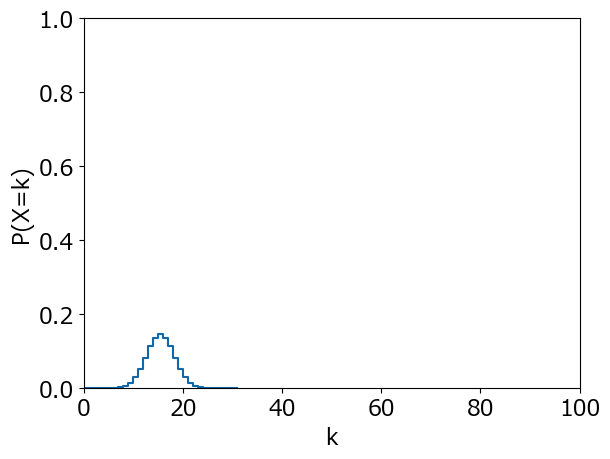

In [4]:
##-- 変更する変数 --##
n = 30
p = 0.5
##------------------##

binom_func(n,p)

## **ポアソン分布**



$
\begin{equation}
  P(X=k) = e^{-\lambda}・\frac{\lambda^k}{k!}
\end{equation}
$

$\lambda$ : 期待値, 分散

【確認事項】
- パラメーターによってどのように分布の形状が変わるかを確認する
- 期待期が大きいほど分散が大きくなることを確認する。
- 期待値が多い時にガウス分布に近づくこと確認する。(連続分布の記事を参照)

※ upper はグラフの描画範囲を決めるもので、関数のパラメータでないことに注意

In [5]:
def poisson_func(  lambda_, upper=10):
    """ポアソン分布を作成し、描画する関数

    Args:
        lambda_ (float): パラメータλ
        upper (int, optional): 描画範囲. デフォルトは300.
    """

    k  = np.arange(0, upper) # 確率変数の指定
    kk = np.sort( np.append(k,k) )
    px = poisson.pmf(kk, lambda_) # ポアソン分布の確率作成
    kk = np.roll(kk,-1)
    kk[-1]=upper+1
    kk = np.append(kk, upper+1)
    px = np.append(px, 0)
    
    
    
    fig = plt.figure()
    ax  = fig.add_subplot()
    ax.set_xlabel("k")
    ax.set_ylabel("P(X=k)")
    ax.set_ylim(0,0.4)
    ax.set_xlim(0,upper)

    ax.plot(kk, px, color="#1167A7", marker="")
    plt.show()

In [6]:
interact(poisson_func, lambda_=(0,10,0.1), upper=fixed(10) ) # ここを変更する

interactive(children=(FloatSlider(value=5.0, description='lambda_', max=10.0), Output()), _dom_classes=('widge…

<function __main__.poisson_func(lambda_, upper=10)>

In [7]:
interact(poisson_func, lambda_=(1,300,1), upper=fixed(300))

interactive(children=(IntSlider(value=150, description='lambda_', max=300, min=1), Output()), _dom_classes=('w…

<function __main__.poisson_func(lambda_, upper=10)>

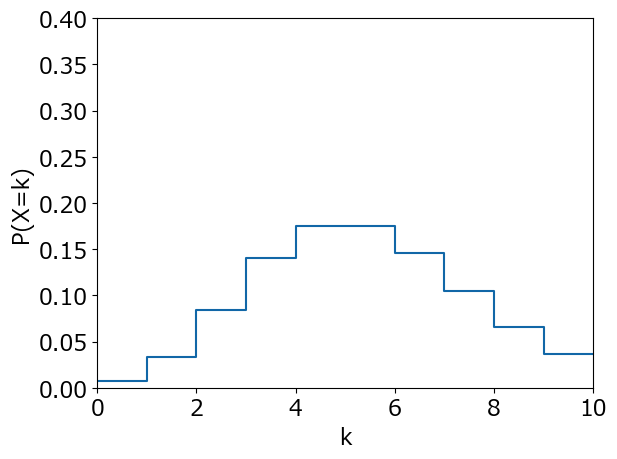

In [8]:
##-- 変更する変数 --##
lambda_ = 5
##------------------##

poisson_func(lambda_)

## **幾何分布**

$
\begin{equation}
  P(X=k)=(1-p)^{k-1}p
\end{equation}
$

$p$ : 1 試行ごとの成功確率


【確認事項】
- パラメーターによってどのように分布の形状が変わるかを確認する

In [9]:
def geom_func(p):
    """幾何分布を作成し、描画する関数

    Args:
        p (float): 確率
    """    
    k  = np.arange(0, 50) # 確率変数の指定
    kk = np.sort( np.append(k,k) )
    px = geom.pmf(kk, p) # 幾何分布の確率作成
    kk = np.roll(kk,-1)
    kk[-1]=50+1
    kk = np.append(kk, 50+1)
    px = np.append(px, 0)

    fig = plt.figure()
    ax  = fig.add_subplot()
    ax.set_xlabel("k")
    ax.set_ylabel("P(X=k)")
    ax.set_ylim(0,0.4)
    ax.set_xlim(0,50)   

    ax.plot(kk, px, color="#1167A7", marker="")
    plt.show()

In [10]:
interact(geom_func, p=(0,1,0.05)) # ここを変更する

interactive(children=(FloatSlider(value=0.0, description='p', max=1.0, step=0.05), Output()), _dom_classes=('w…

<function __main__.geom_func(p)>

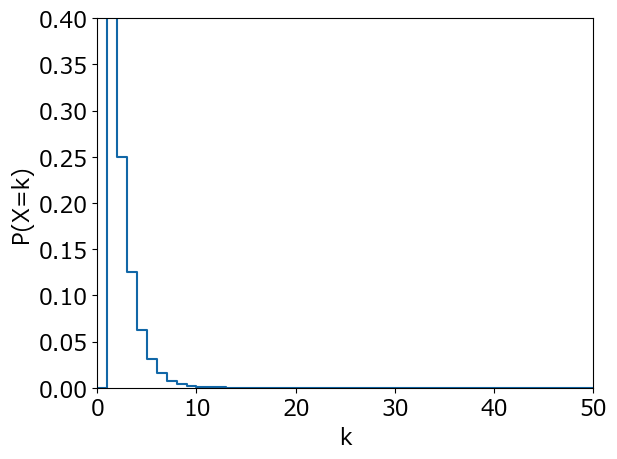

In [11]:
##-- 変更する変数 --##
p = 0.5
##------------------##

geom_func(p)